In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))

palette = ['#199de5', '#fbbc04']

sc.settings.figdir = './figures_somatic/'

In [2]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig('barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

# Somatic cells

In [3]:
adata = sc.read('/nfs/team292/vl6/Monkey_Zhao/supporting.h5ad')

In [4]:
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
CoelEpi_LHX9,36,0.009701
OSE,685,0.184586
granulosa,488,0.131501
preGC_I,244,0.065750
preGC_II,2258,0.608461


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


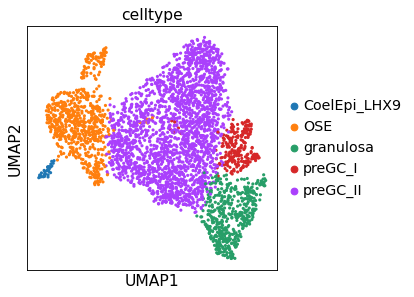

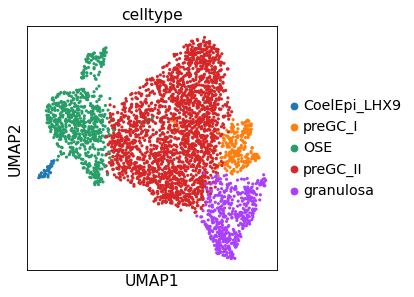

In [5]:
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['CoelEpi_LHX9',  'preGC_I','OSE', 'preGC_II', 'granulosa'], inplace=True)
sc.pl.umap(adata, color=['celltype'])

In [6]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 3711
Total number of genes: 15702


## Plot cellphoneDB genes

In [8]:
cellphoneDB_genes = {
    'cortex':{'BMP4','IGF1','PTGER3',  'PDGFRA','ADRA2A','ADRB3','EPHA4','EFNB2','EFNB3', 'CXCR4', 'KITLG', 'NRG1', 'NOTCH2'},
    'medulla':{'NOTCH2', 'ESR1', 'CYP19A1', 'HSD17B1', 'AR','ACVR2B', 'BMPR1B','BMP2' ,
                     'STRA6', 'PTHLH' , 'ALDH1A1', 'EFNB1', 'NR1H4'},
    'follicle':{'BMPR2', 'BMPR1B', 'ACVR2B', 'TGFBR1', 'NOTCH1','NOTCH2', 'NOTCH3', 'CD46', 'HRH1', 'ERBB4', 'RARRES2', 'EGFR', 'NTN1'}
}

In [9]:
cellphoneDB_genes_sorted = []

for group in cellphoneDB_genes.keys():
    cellphoneDB_genes[group] = [ i for i in cellphoneDB_genes[group] if i in adata.var_names ]
    cellphoneDB_genes[group] = sorted(cellphoneDB_genes[group])
    
    
genes = [item for sublist in cellphoneDB_genes.values() for item in sublist]

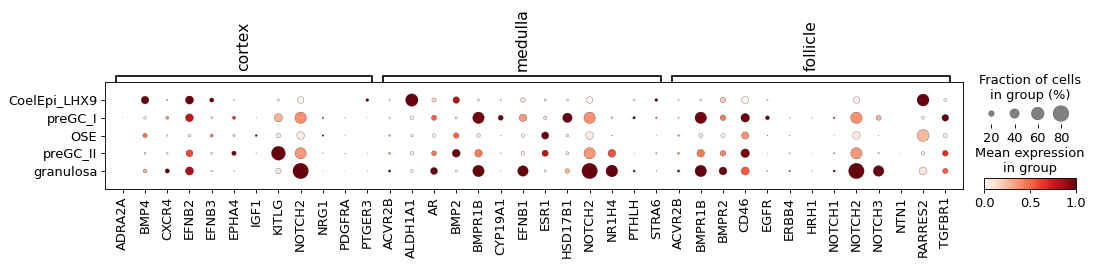

In [12]:
sc.pl.dotplot(adata, cellphoneDB_genes, groupby='celltype', standard_scale = 'var', save='_macaque_cellphoneDB_somatic.pdf')

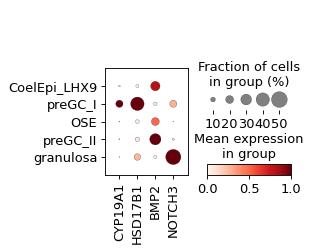

In [20]:
sc.pl.dotplot(adata, ['CYP19A1', 'HSD17B1', 'BMP2', 'NOTCH3'], groupby='celltype', standard_scale = 'var', save='_macaque_2wavesignalling.pdf')